In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import copy
from PIL import Image

In [2]:
num_px = 200 #this is very important! it's the dimension of the images!

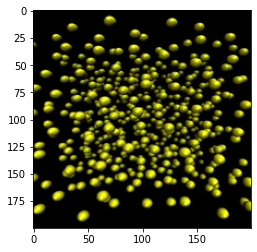

In [4]:
# change this to the name of the chosen image file
my_image = "0012.jpg"   

# We preprocess the image to fit the algorithm.
fname = "/home/pher/Documents/computational/newmovies/frames/1.1_2/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)

image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

In [5]:
print(image.shape)

(120000, 1)


In [6]:
print(image[23132])

[0.00392157]


# Qui creiamo il TRAIN SET

In [7]:
start = 101
stop = 500
step = 10
number_movies = 10 # the number of movies in the simulation

m = (math.floor((stop-start)/step) + 1 ) * number_movies
print(m)

400


In [8]:
trainset_x = np.zeros([num_px * num_px *3,m])

In [9]:
print(trainset_x.shape)

(120000, 400)


In [10]:
cartelle = ["1.1_3", "0.3", "1.1_4", "0.3_4", "1.1_5",  "0.3_2", "1.1", "0.3_3", "1.1_2", "0.3_5"]
solidi = ["1.1_3", "1.1_5", "1.1_4", "1.1", "1.1_2",]
randomici = [i for i in range(m)]
    
random.shuffle(randomici)

In [11]:
trainset_y = np.zeros([1,m])

In [12]:
print(trainset_y.shape)

(1, 400)


In [13]:
count = 0
x = 0
for cartella in cartelle:
    fnames = ['/home/pher/Documents/computational/newmovies/frames/' + cartella + '/{:04}.jpg'.format(i) for i in range(start, stop+1, step)]
    if cartella in solidi:
        stato = 1
    else:
        stato = 0
        
    for i in fnames:
        j = randomici[x]
        x += 1
        fname = i
        image = np.array(Image.open(fname).resize((num_px, num_px)))
        image = image / 255.
        image = image.reshape((num_px * num_px * 3)).T
        trainset_x[:,j] = image
        trainset_y[0,j] = stato

    count += int(m/number_movies)
    print ("Test set acquired to {}/{}".format(count, m))

Test set acquired to 40/400
Test set acquired to 80/400
Test set acquired to 120/400
Test set acquired to 160/400
Test set acquired to 200/400
Test set acquired to 240/400
Test set acquired to 280/400
Test set acquired to 320/400
Test set acquired to 360/400
Test set acquired to 400/400


# Qui creiamo il TEST SET

In [14]:
start = 51
stop = 101
step = 5
number_movies = 10 # the number of movies in the simulation

mm = (math.floor((stop-start)/step) + 1 ) * number_movies
print(mm)

110


In [15]:
testset_x = np.zeros([num_px * num_px *3,mm])

In [16]:
print(testset_x.shape)

(120000, 110)


In [17]:
cartelle = ["1.1_3", "0.3", "1.1_4", "0.3_4", "1.1_5",  "0.3_2", "1.1", "0.3_3", "1.1_2", "0.3_5"]
solidi = ["1.1_3", "1.1_5", "1.1_4", "1.1", "1.1_2",]
randomici = [i for i in range(mm)]
    
random.shuffle(randomici)

In [18]:
testset_y = np.zeros([1,mm])

In [19]:
print(testset_y.shape)

(1, 110)


In [20]:
count = 0
x = 0
for cartella in cartelle:
    fnames = ['/home/pher/Documents/computational/newmovies/frames/' + cartella + '/{:04}.jpg'.format(i) for i in range(start, stop+1, step)] #in caso quel 20 si può cambiare, così da prendere più o meno immagini
    if cartella in solidi:
        stato = 1
    else:
        stato = 0
        
    for i in fnames:
        j = randomici[x]
        x += 1
        fname = i
        image = np.array(Image.open(fname).resize((num_px, num_px)))
        image = image / 255.
        image = image.reshape((num_px * num_px * 3)).T
        testset_x[:,j] = image
        testset_y[0,j] = stato

    count += int(mm/number_movies)
    print ("Test set acquired to {}/{}".format(count, mm))

Test set acquired to 11/110
Test set acquired to 22/110
Test set acquired to 33/110
Test set acquired to 44/110
Test set acquired to 55/110
Test set acquired to 66/110
Test set acquired to 77/110
Test set acquired to 88/110
Test set acquired to 99/110
Test set acquired to 110/110


In [21]:
train_set_y = trainset_y
test_set_y = testset_y
train_set_x = trainset_x
test_set_x = testset_x

del trainset_y
del testset_y
del trainset_x
del testset_x

In [2]:


def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1 + np.exp(-z))
    
    return s

In [23]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]



### initialize with zeros


In [1]:


def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    w = np.zeros((dim,1))
    b = 0.0

    return w, b

In [25]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0




Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [26]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    A1 = np.dot(w.T,X) + b
    A = sigmoid(A1)
    cost1 = np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    cost = cost1 * (-1/m)
    
    
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    var1 = np.dot(X, (A-Y).T)
    dw = var1 / m
    var2 = np.sum(A-Y)
    db = var2 / m
    # YOUR CODE ENDS HERE
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

**Expected output**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [27]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    print(learning_rate)
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


### Predict


1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [28]:


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    

    A = sigmoid(np.dot(w.T,X)+b)

    
    for i in range(A.shape[1]):
        

        
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
        

    
    return Y_prediction


### Model
Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [29]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    
    w, b = initialize_with_zeros(X_train.shape[0])

    print(learning_rate)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = params["w"]
    b = params["b"]
   
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [30]:
NUM_ITERATIONS = 20000
LEARNING_RATE = 0.0005


In [31]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=NUM_ITERATIONS, learning_rate=LEARNING_RATE, print_cost=True)

0.0005
0.0005
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.477761
Cost after iteration 200: 0.379760
Cost after iteration 300: 0.312086
Cost after iteration 400: 0.263204
Cost after iteration 500: 0.226568
Cost after iteration 600: 0.198264
Cost after iteration 700: 0.175841
Cost after iteration 800: 0.157699
Cost after iteration 900: 0.142758
Cost after iteration 1000: 0.130263
Cost after iteration 1100: 0.119677
Cost after iteration 1200: 0.110605
Cost after iteration 1300: 0.102753
Cost after iteration 1400: 0.095896
Cost after iteration 1500: 0.089861
Cost after iteration 1600: 0.084512
Cost after iteration 1700: 0.079741
Cost after iteration 1800: 0.075461
Cost after iteration 1900: 0.071602
Cost after iteration 2000: 0.068105
Cost after iteration 2100: 0.064924
Cost after iteration 2200: 0.062017
Cost after iteration 2300: 0.059352
Cost after iteration 2400: 0.056900
Cost after iteration 2500: 0.054637
Cost after iteration 2600: 0.052543
Cost after iteration 2700:

### If training accuracy is close to 100% this is a good sanity check. The NN can fit the train data pretty well.

### Let's also plot the cost function at the variation of the learning step.

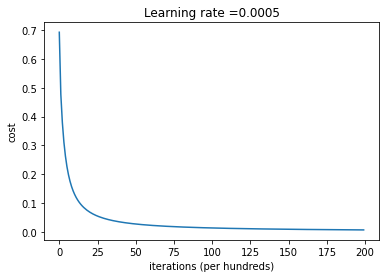

In [32]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()